In [83]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [58]:
df_Welly= pd.read_csv('Wellington.csv')
print(df_Welly)

     Unnamed: 0        date  Wellington    lagged
0             0  1992-01-31    123000.0       NaN
1             1  1992-02-29    122000.0  123000.0
2             2  1992-03-31    125000.0  122000.0
3             3  1992-04-30    129000.0  125000.0
4             4  1992-05-31    128000.0  129000.0
..          ...         ...         ...       ...
387         387  2024-04-30    820000.0  820000.0
388         388  2024-05-31    785000.0  820000.0
389         389  2024-06-30    793000.0  785000.0
390         390  2024-07-31    765000.0  793000.0
391         391  2024-08-31    790000.0  765000.0

[392 rows x 4 columns]


In [59]:
df_Welly['date'] = pd.to_datetime(df_Welly['date'], format='%Y-%m-%d', errors='coerce')

<Axes: >

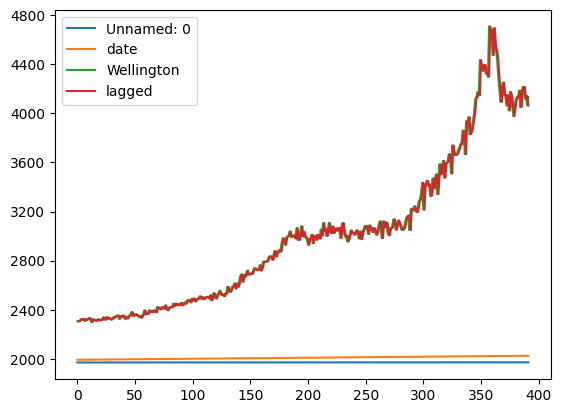

In [60]:
df_Welly.plot()


In [61]:
df_Welly.drop(df_Welly.columns[0], axis=1)

,date,Wellington,lagged
0,1992-01-31,123000.0,NaN
1,1992-02-29,122000.0,123000.0
2,1992-03-31,125000.0,122000.0
3,1992-04-30,129000.0,125000.0
4,1992-05-31,128000.0,129000.0
...,...,...,...
387,2024-04-30,820000.0,820000.0
388,2024-05-31,785000.0,820000.0
389,2024-06-30,793000.0,785000.0
390,2024-07-31,765000.0,793000.0


In [62]:
%pip install openpyxl

In [63]:
df_expenses = pd.read_excel('House expense.xlsx')
df_expenses

,Unnamed: 0,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
0,NaN,A. Household net financial wealth (A1-A2),A1. Household financial assets,A2. Household financial liabilities,B. Household net wealth (B1+B2),B1. Household net financial wealth,B2. Housing and land value,C. Net equity in housing (C1-C2),C1. Housing and land value,C2. Housing loans,...,Household financial liabilities (including ren...,Household financial liabilities (including ren...,D. Total interest payments (D1+D2),D1. Interest payments on housing loans (in...,D2. Interest payments on consumer loans,D3. Total interest payments as a percentag...,E. Total interest payments (E1+E2),E1. Interest payments on housing loans (in...,E2. Interest payments on consumer loans,E3. Total interest payments as a percentag...
1,Notes,NaN,NaN,NaN,Yes,NaN,Yes,Yes,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NZDm,NZDm,NZDm,NZDm,NZDm,NZDm,NZDm,NZDm,NZDm,...,NZDm,%,NZDm,NZDm,NZDm,%,NZDm,NZDm,NZDm,%
3,Series Id,HHAL.QC5,HHAL.QA,HHAL.QB,HHAL.QC3,HHAL.QC5,HHAL.QC6,HHAL.QC2,HHAL.QC6,HHAL.QB11,...,HHAL.QM21,HHAL.QM23,HHAL.QD2.ZZH,HHAL.QD2.ZZH1,HHAL.QD2.ZZH2,HHAL.QR7.ZZH,HHAL.QD2.ZZHrt12,HHAL.QD2.ZZH1rt12,HHAL.QD2.ZZH2rt12,HHAL.QR7.ZZHrt12
4,1998-12-31 00:00:00,258766,307995,49229,435170,258766,176404,136555,176404,39849,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020-06-30 00:00:00,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
91,2020-09-30 00:00:00,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
92,2020-12-31 00:00:00,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2
93,2021-03-31 00:00:00,1163866,1419615,255749,2307726,1163866,1143860,918905,1143860,224955,...,340072,167,2856,2480,376,5.4,11955,10384,1571,5.9


In [64]:
df_expenses = df_expenses.drop(index=[0, 1, 2, 3], axis=1)
df_expenses

,Unnamed: 0,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
4,1998-12-31 00:00:00,258766,307995,49229,435170,258766,176404,136555,176404,39849,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
5,1999-03-31 00:00:00,265778,316060,50282,443779,265778,178000,137048,178000,40953,...,67064,100,1337,1084,252,7.8,NaN,NaN,NaN,NaN
6,1999-06-30 00:00:00,271003,322900,51896,451398,271003,180395,138383,180395,42012,...,69124,101,1330,1078,252,7.5,NaN,NaN,NaN,NaN
7,1999-09-30 00:00:00,276606,329750,53143,457799,276606,181193,138003,181193,43190,...,70750,101,1345,1092,253,7.5,5400,4381,1019,7.7
8,1999-12-31 00:00:00,282895,337334,54439,464088,282895,181193,137115,181193,44078,...,72425,102,1383,1116,268,7.6,5394,4370,1024,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020-06-30 00:00:00,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
91,2020-09-30 00:00:00,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
92,2020-12-31 00:00:00,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2
93,2021-03-31 00:00:00,1163866,1419615,255749,2307726,1163866,1143860,918905,1143860,224955,...,340072,167,2856,2480,376,5.4,11955,10384,1571,5.9


In [65]:
df_expenses.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [66]:
df_expenses.set_index('date')
df_expenses

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,date,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
4,1998-12-31 00:00:00,258766,307995,49229,435170,258766,176404,136555,176404,39849,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
5,1999-03-31 00:00:00,265778,316060,50282,443779,265778,178000,137048,178000,40953,...,67064,100,1337,1084,252,7.8,NaN,NaN,NaN,NaN
6,1999-06-30 00:00:00,271003,322900,51896,451398,271003,180395,138383,180395,42012,...,69124,101,1330,1078,252,7.5,NaN,NaN,NaN,NaN
7,1999-09-30 00:00:00,276606,329750,53143,457799,276606,181193,138003,181193,43190,...,70750,101,1345,1092,253,7.5,5400,4381,1019,7.7
8,1999-12-31 00:00:00,282895,337334,54439,464088,282895,181193,137115,181193,44078,...,72425,102,1383,1116,268,7.6,5394,4370,1024,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020-06-30 00:00:00,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
91,2020-09-30 00:00:00,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
92,2020-12-31 00:00:00,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2
93,2021-03-31 00:00:00,1163866,1419615,255749,2307726,1163866,1143860,918905,1143860,224955,...,340072,167,2856,2480,376,5.4,11955,10384,1571,5.9


In [67]:
df_expenses.reset_index(drop = True)

,date,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
0,1998-12-31 00:00:00,258766,307995,49229,435170,258766,176404,136555,176404,39849,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
1,1999-03-31 00:00:00,265778,316060,50282,443779,265778,178000,137048,178000,40953,...,67064,100,1337,1084,252,7.8,NaN,NaN,NaN,NaN
2,1999-06-30 00:00:00,271003,322900,51896,451398,271003,180395,138383,180395,42012,...,69124,101,1330,1078,252,7.5,NaN,NaN,NaN,NaN
3,1999-09-30 00:00:00,276606,329750,53143,457799,276606,181193,138003,181193,43190,...,70750,101,1345,1092,253,7.5,5400,4381,1019,7.7
4,1999-12-31 00:00:00,282895,337334,54439,464088,282895,181193,137115,181193,44078,...,72425,102,1383,1116,268,7.6,5394,4370,1024,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020-06-30 00:00:00,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
87,2020-09-30 00:00:00,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
88,2020-12-31 00:00:00,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2
89,2021-03-31 00:00:00,1163866,1419615,255749,2307726,1163866,1143860,918905,1143860,224955,...,340072,167,2856,2480,376,5.4,11955,10384,1571,5.9


In [68]:
df_expenses.isna()


,date,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
df_expenses['date'] = pd.to_datetime(df_expenses['date'], format='%Y-%m-%d', errors='coerce')
df_expenses

,date,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,Net equity in housing.1,Net equity in housing.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
4,1998-12-31,258766,307995,49229,435170,258766,176404,136555,176404,39849,...,65568,99,1389,1127,263,8.2,NaN,NaN,NaN,NaN
5,1999-03-31,265778,316060,50282,443779,265778,178000,137048,178000,40953,...,67064,100,1337,1084,252,7.8,NaN,NaN,NaN,NaN
6,1999-06-30,271003,322900,51896,451398,271003,180395,138383,180395,42012,...,69124,101,1330,1078,252,7.5,NaN,NaN,NaN,NaN
7,1999-09-30,276606,329750,53143,457799,276606,181193,138003,181193,43190,...,70750,101,1345,1092,253,7.5,5400,4381,1019,7.7
8,1999-12-31,282895,337334,54439,464088,282895,181193,137115,181193,44078,...,72425,102,1383,1116,268,7.6,5394,4370,1024,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020-06-30,956696,1196412,239716,1885023,956696,928327,719858,928327,208469,...,315379,159,3128,2716,412,6.4,13264,11428,1836,6.7
91,2020-09-30,1007798,1251518,243721,1976170,1007798,968372,755476,968372,212896,...,321331,161,3016,2625,391,6,12847,11104,1743,6.4
92,2020-12-31,1098510,1348387,249876,2146120,1098510,1047609,828614,1047609,218995,...,330819,164,2954,2563,391,5.8,12426,10766,1660,6.2
93,2021-03-31,1163866,1419615,255749,2307726,1163866,1143860,918905,1143860,224955,...,340072,167,2856,2480,376,5.4,11955,10384,1571,5.9


In [70]:
welly_expenses = df_Welly.merge(df_expenses, on= 'date', how = 'inner' )

In [76]:
welly_expenses.dropna().head(5)

,Unnamed: 0,date,Wellington,lagged,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
5,98,2000-03-31,179000.0,185000.0,287245,342476,55231,469165,287245,181920,...,73533,102,1466,1191,275,8.1,5523,4477,1047,7.7
9,110,2001-03-31,190000.0,188000.0,291402,350838,59436,477998,291402,186596,...,78820,110,1684,1361,323,9.3,6566,5327,1239,9.2
13,122,2002-03-31,204500.0,200000.0,299288,363901,64613,500170,299288,200881,...,85524,113,1584,1254,329,8.3,6492,5179,1313,8.6
17,134,2003-03-31,225500.0,215000.0,308597,381078,72481,542511,308597,233914,...,95686,124,1855,1479,376,9.4,7111,5660,1452,9.2
21,146,2004-03-31,262000.0,255000.0,359757,443392,83635,662432,359757,302675,...,110845,131,2035,1631,404,9.4,7722,6157,1565,9.2


In [78]:
welly_expenses.head()

,Unnamed: 0,date,Wellington,lagged,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
5,98,2000-03-31,179000.0,185000.0,287245,342476,55231,469165,287245,181920,...,73533,102,1466,1191,275,8.1,5523,4477,1047,7.7
9,110,2001-03-31,190000.0,188000.0,291402,350838,59436,477998,291402,186596,...,78820,110,1684,1361,323,9.3,6566,5327,1239,9.2
13,122,2002-03-31,204500.0,200000.0,299288,363901,64613,500170,299288,200881,...,85524,113,1584,1254,329,8.3,6492,5179,1313,8.6
17,134,2003-03-31,225500.0,215000.0,308597,381078,72481,542511,308597,233914,...,95686,124,1855,1479,376,9.4,7111,5660,1452,9.2
21,146,2004-03-31,262000.0,255000.0,359757,443392,83635,662432,359757,302675,...,110845,131,2035,1631,404,9.4,7722,6157,1565,9.2


In [82]:
welly_expenses.drop(welly_expenses.columns[0], axis=1)

,date,Wellington,lagged,Household net financial wealth,Household net financial wealth.1,Household net financial wealth.2,Household net wealth,Household net wealth.1,Household net wealth.2,Net equity in housing,...,Memo item: Household debt including rental properties,Memo item: Household debt including rental properties.1,Memo item: Household debt servicing (quarterly),Memo item: Household debt servicing (quarterly).1,Memo item: Household debt servicing (quarterly).2,Memo item: Household debt servicing (quarterly).3,Memo item: Household debt servicing (year ended),Memo item: Household debt servicing (year ended).1,Memo item: Household debt servicing (year ended).2,Memo item: Household debt servicing (year ended).3
5,2000-03-31,179000.0,185000.0,287245,342476,55231,469165,287245,181920,137066,...,73533,102,1466,1191,275,8.1,5523,4477,1047,7.7
9,2001-03-31,190000.0,188000.0,291402,350838,59436,477998,291402,186596,139045,...,78820,110,1684,1361,323,9.3,6566,5327,1239,9.2
13,2002-03-31,204500.0,200000.0,299288,363901,64613,500170,299288,200881,149610,...,85524,113,1584,1254,329,8.3,6492,5179,1313,8.6
17,2003-03-31,225500.0,215000.0,308597,381078,72481,542511,308597,233914,177111,...,95686,124,1855,1479,376,9.4,7111,5660,1452,9.2
21,2004-03-31,262000.0,255000.0,359757,443392,83635,662432,359757,302675,236235,...,110845,131,2035,1631,404,9.4,7722,6157,1565,9.2
25,2005-03-31,289500.0,275500.0,379352,475294,95941,731810,379352,352458,275461,...,127536,139,2474,2019,456,10.6,9199,7470,1730,10.1
29,2006-03-31,320000.0,305500.0,433921,542992,109071,838782,433921,404861,316104,...,145587,150,2940,2446,494,11.8,11040,9128,1912,11.4
33,2007-03-31,375000.0,372000.0,489227,612077,122851,945909,489227,456682,355477,...,164538,156,3374,2856,518,12.4,12784,10757,2027,12.1
37,2008-03-31,405000.0,381000.0,499554,635278,135724,977580,499554,478026,365570,...,181987,156,3944,3385,559,13.3,14969,12801,2169,12.9
41,2009-03-31,375000.0,376000.0,483057,621829,138772,920431,483057,437374,321570,...,186029,158,3818,3293,525,12.8,16038,13832,2207,13.6


EDA

In [84]:
train, test = train_test_split(df_Welly, test_size = 0.2, shuffle = True)

In [85]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
random_param_grid = {
    'n_estimators': 200,
    'max_depth':  10
    
}

In [86]:
rf_model.fit(train[['lagged']], train[['Wellington']])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [87]:
rf_pred = rf_model.predict(train[['lagged']])

In [89]:
mae = mean_absolute_error(rf_pred, train.Wellington)
print(mae)


8520.951220044146


In [91]:
mse = mean_squared_error(rf_pred, train.Wellington)
print(mse)

194747975.19010887


In [92]:
rmse = r2_score(rf_pred, train.Wellington)
print(rmse)

0.9961654549068619


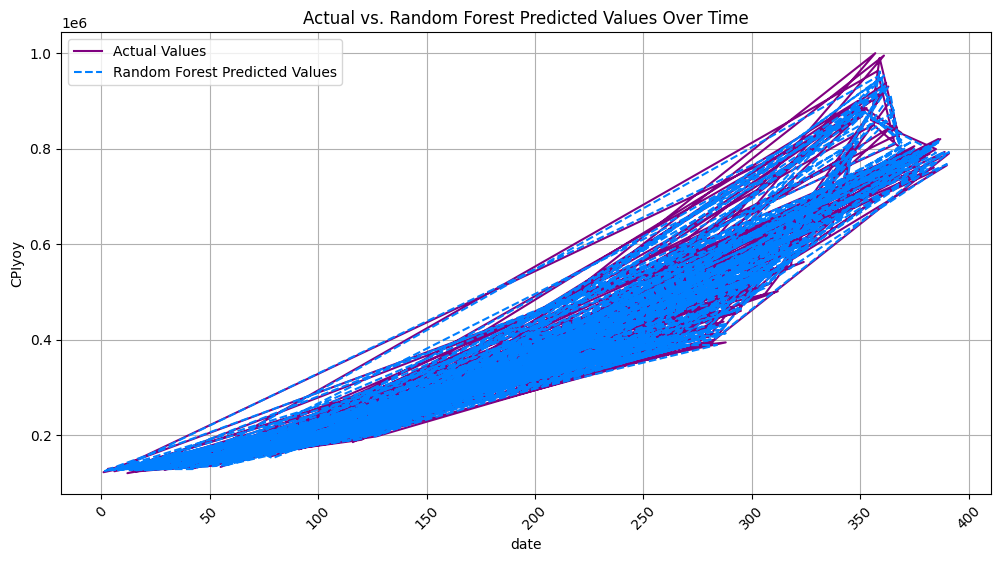

In [93]:
from matplotlib import pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(train.index, train.Wellington ,label='Actual Values', linestyle='-', color = 'purple')
plt.plot(train.index, rf_pred, label='Random Forest Predicted Values', linestyle='--', color = '#007FFF')
plt.xlabel('date')
plt.ylabel('CPIyoy')
plt.title('Actual vs. Random Forest Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()